In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Загрузка данных

В бейзлайне реализована простейшая модель на эго-графе.

Для каждой пары вершин u и v эго-графа попытаемся найти всех общих "друзей" w. Силой связи между вершинами u и v будем считать средную силу связи между ними и общими друзьями.

Поскольку обучение для такой модели не требуется, будем пользоваться только тестовой выборкой.

In [ ]:
t — целое число дней, прошедшее с возникновения дружбы между
каждой парой пользователей (-1, если дружбы нет)

In [11]:
%%time

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")
attr = pd.read_csv('attr.csv')

CPU times: total: 31.6 s
Wall time: 1min 14s


### Анализ данных с атрибутами

In [38]:
attr.head()

,ego_id,u,age,city_id,sex,school,university
0,0,227,68,-1,1,778293348,-1
1,0,45,38,237065842,1,82803468,238500268
2,0,142,60,237065842,1,196560139,-1
3,0,280,66,-1,2,963209731,720783270
4,0,41,18,-1,2,308862409,-1


Можем заметить что максимальный возраст 789, а так же по городам, школам и университетам половина данных с пропусками,
при этом сами значения очень большие

In [162]:
attr.describe()

,ego_id,u,age,city_id,sex,school,university
count,1.493075e+07,1.493075e+07,1.493075e+07,1.493075e+07,1.493075e+07,1.493075e+07,1.493075e+07
mean,8.545402e+11,1.168134e+02,3.274500e+01,3.216615e+08,1.441358e+00,2.021250e+08,1.394163e+08
std,4.957422e+11,7.996565e+01,1.679906e+01,3.327196e+08,4.988081e-01,3.063151e+08,2.711109e+08
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,4.294967e+11,4.900000e+01,2.100000e+01,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00
50%,8.504035e+11,1.050000e+02,3.100000e+01,2.236002e+08,1.000000e+00,-1.000000e+00,-1.000000e+00
75%,1.288490e+12,1.760000e+02,3.900000e+01,6.106148e+08,2.000000e+00,3.813690e+08,1.040703e+08
max,1.709397e+12,2.990000e+02,7.890000e+02,1.000000e+09,2.000000e+00,1.000000e+09,9.999991e+08


In [161]:
attr[attr['age'] == 789]

,ego_id,u,age,city_id,sex,school,university
10525954,1211180777570,81,789,-1,2,-1,764240167


<Axes: >

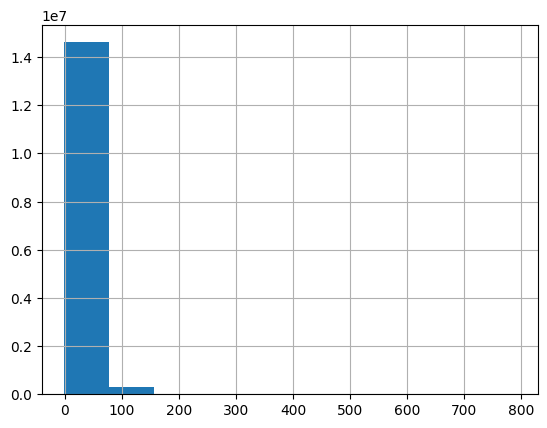

In [163]:
attr['age'].hist()

<Axes: >

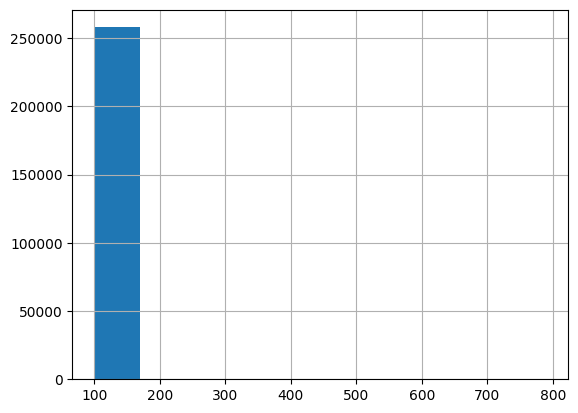

In [12]:
attr[attr['age']>100]['age'].hist()

Также мы заметили, что в аттрибутах есть лишние записи, так как некоторых u нет в traine 

In [39]:
attr[attr['ego_id'] == 0]['u'].nunique()

286

In [41]:
train[train['ego_id'] == 0]['u'].nunique()

272

In [42]:
train[train['ego_id'] == 0]['v'].nunique()

274

In [45]:
v_train = set(train[train['ego_id'] == 0]['v'])
u_train = set(train[train['ego_id'] == 0]['u'])
u_attr = set(attr[attr['ego_id'] == 0]['u'])

In [57]:
v_train.update(u_train)
u_attr.difference_update(v_train)
u_attr

{88, 146, 283, 291}

In [61]:
train[(train['ego_id'] == 0) & ((train['u'] == 88) | (train['v'] == 88))]

,ego_id,u,v,t,x1,x2,x3


In [60]:
attr[(attr['ego_id'] == 0) & (attr['u'] == 88)]

,ego_id,u,age,city_id,sex,school,university
130,0,88,44,515825832,1,964155873,-1


In [40]:
test[test['ego_id'] == 0]['u'].nunique()

0

In [62]:
submission[submission['ego_id'] == 0]['u'].nunique()

0

In [112]:
dictt = {}
for u in t0.u.unique():
    dictt[u] = set(t0[t0['u'] == u].v)

In [114]:
dictt[131].intersection(dictt[5])

{0}

In [118]:
dictt

{131: {0, 69, 84, 96, 153, 182, 265},
 135: {0, 164, 165, 205},
 47: {15, 45, 46},
 5: {0,
  3,
  4,
  7,
  9,
  16,
  18,
  23,
  34,
  37,
  42,
  51,
  52,
  55,
  56,
  57,
  90,
  92,
  139,
  170,
  218,
  230,
  256,
  264},
 176: {127,
  167,
  177,
  180,
  187,
  188,
  189,
  200,
  203,
  209,
  219,
  232,
  244,
  260,
  287},
 0: {3,
  4,
  5,
  6,
  7,
  10,
  11,
  12,
  13,
  14,
  16,
  20,
  21,
  23,
  24,
  27,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  38,
  40,
  42,
  43,
  44,
  45,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  58,
  60,
  62,
  63,
  65,
  66,
  68,
  70,
  71,
  73,
  75,
  76,
  78,
  79,
  80,
  81,
  82,
  84,
  85,
  86,
  87,
  89,
  90,
  92,
  95,
  96,
  97,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  115,
  117,
  118,
  120,
  121,
  123,
  124,
  127,
  128,
  130,
  131,
  132,
  133,
  134,
  135,
  137,
  138,
  140,
  141,
  143,
  145,
  148,
  149,
  150,
  151,
  152,
  153,
  

In [119]:
len(dictt[131])

7

анализ теста

In [37]:
test.describe()

,ego_id,u,v,t,x1,x2,x3
count,4.054878e+07,4.054878e+07,4.054878e+07,3.430106e+07,3.243902e+07,4.054878e+07,4.054878e+07
mean,8.630826e+11,8.760846e+01,9.466772e+01,1.143237e+02,6.974639e-01,2.011065e-01,1.540051e-01
std,4.924068e+11,6.984842e+01,7.386303e+01,1.128908e+02,1.362519e+00,7.896298e-01,3.609536e-01
min,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.466766e+11,3.000000e+01,3.300000e+01,2.770000e+01,1.088933e-05,0.000000e+00,0.000000e+00
50%,8.675834e+11,7.300000e+01,7.900000e+01,8.130000e+01,7.645115e-02,0.000000e+00,0.000000e+00
75%,1.288490e+12,1.330000e+02,1.430000e+02,1.614000e+02,9.071086e-01,0.000000e+00,0.000000e+00
max,1.709397e+12,2.990000e+02,2.990000e+02,5.945000e+02,3.243133e+01,1.044433e+01,1.000000e+00


In [33]:
submission.head()

,ego_id,u,v,x1
0,8,0,93,NaN
1,8,0,143,NaN
2,8,0,151,NaN
3,8,1,24,NaN
4,8,5,4,NaN


анализ трейна

In [6]:
train.head()

,ego_id,u,v,t,x1,x2,x3
0,0,131,84,148.0,5.669200e-07,0.0,0.0
1,0,135,164,396.7,6.246274e-02,0.0,0.0
2,0,47,15,NaN,0.000000e+00,0.0,1.0
3,0,5,4,594.5,4.962974e-02,0.0,0.0
4,0,176,219,45.5,1.237935e+00,0.0,0.0


In [18]:
train.describe()

,ego_id,u,v,t,x1,x2,x3
count,1.222804e+08,1.222804e+08,1.222804e+08,1.035632e+08,1.222804e+08,1.222804e+08,1.222804e+08
mean,8.508872e+11,8.766378e+01,9.480200e+01,1.140129e+02,6.909837e-01,1.986819e-01,1.526350e-01
std,4.958312e+11,6.990831e+01,7.397358e+01,1.125724e+02,1.354156e+00,7.843783e-01,3.596353e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.209068e+11,3.000000e+01,3.400000e+01,2.760000e+01,1.057975e-05,0.000000e+00,0.000000e+00
50%,8.504035e+11,7.300000e+01,7.900000e+01,8.110000e+01,7.433163e-02,0.000000e+00,0.000000e+00
75%,1.279900e+12,1.330000e+02,1.430000e+02,1.611000e+02,8.960580e-01,0.000000e+00,0.000000e+00
max,1.709397e+12,2.990000e+02,2.990000e+02,5.945000e+02,4.728715e+01,1.074882e+01,1.000000e+00


корреляция таргета со временем прошедшим от начала дружбы и двумя метриками взоимодействия

In [25]:
train[['t','x1','x2' ,'x3']].corr()

,t,x1,x2,x3
t,1.000000,-0.190351,-0.073750,-0.025470
x1,-0.190351,1.000000,0.678870,0.089360
x2,-0.073750,0.678870,1.000000,0.136608
x3,-0.025470,0.089360,0.136608,1.000000


<Axes: >

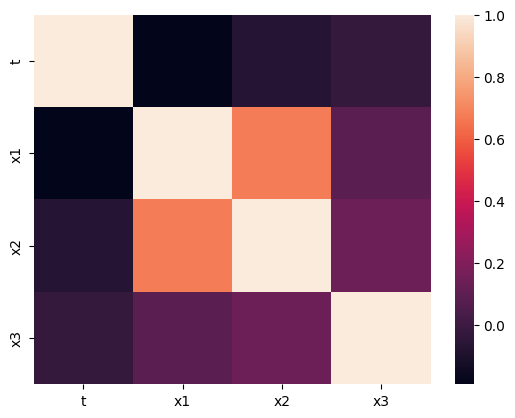

In [29]:
sns.heatmap(train[['t','x1','x2' ,'x3']].corr())

распределение t

<Axes: >

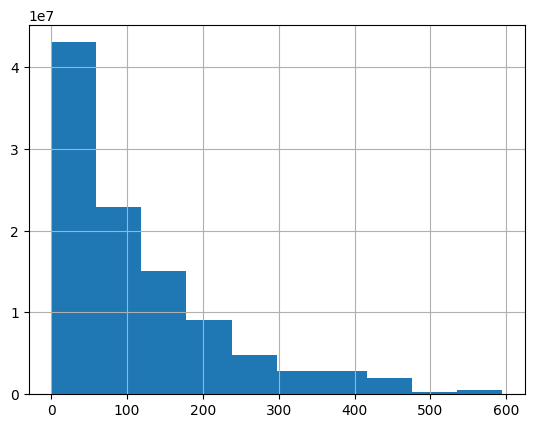

In [32]:
train['t'].hist()

распределение таргета

<Axes: >

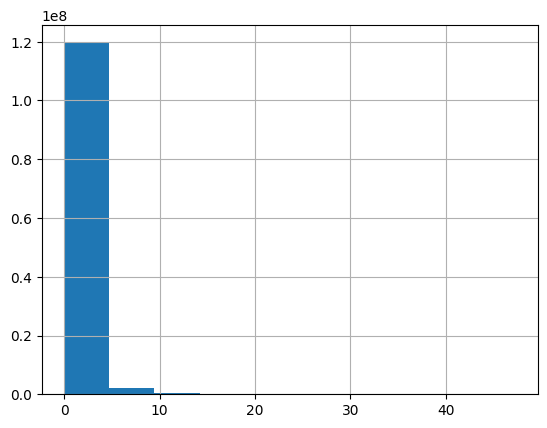

In [23]:
train['x1'].hist()

распределение х2

<Axes: >

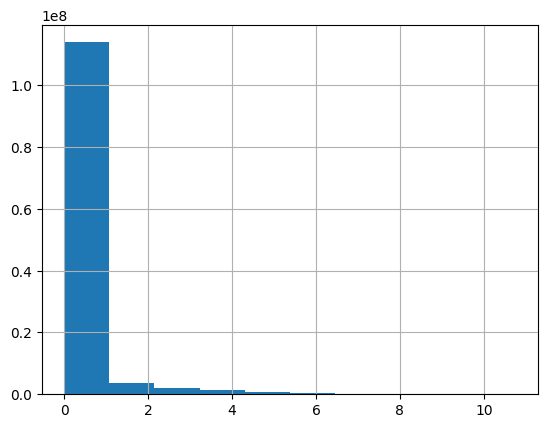

In [19]:
train['x2'].hist()

плотность t по x1, можем также заметить выбросы x1 >= 40 и t > 500

<Axes: xlabel='t', ylabel='x1'>

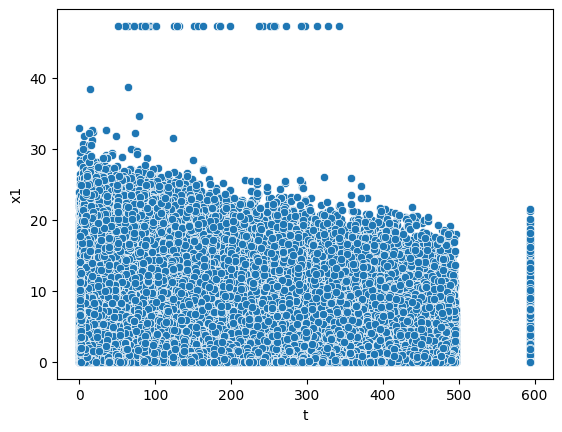

In [33]:
sns.scatterplot(train, x='t', y='x1')

In [63]:
test[test['x1'] >= 40]['u'].count()

0

In [64]:
train[train['x1'] >= 40]['u'].count()

40

Можем заметить что все таргеты больше 40 имеют одно значение, 
возможно большие этого числа обрезали до него или это выбросы( искусственные данные)

In [66]:
train[train['x1'] >= 40]

,ego_id,u,v,t,x1,x2,x3
16361811,223338299664,128,127,85.7,47.287154,0.000000,1.0
28168605,386547057048,23,42,242.5,47.287154,0.000000,1.0
28168704,386547057048,23,41,237.1,47.287154,0.000000,1.0
28168974,386547057048,23,45,92.5,47.287154,0.000000,1.0
28169002,386547057048,23,20,71.5,47.287154,0.000000,1.0
28169061,386547057048,23,16,63.5,47.287154,0.000000,0.0
28169622,386547057048,23,9,88.1,47.287154,0.000000,1.0
28169875,386547057048,23,43,295.9,47.287154,0.000000,0.0
32243423,446676598980,111,91,297.9,47.287154,0.000000,0.0
32244241,446676598980,111,142,272.8,47.287154,0.000000,0.0


In [ ]:
train[train['ego'] >= 40]

In [70]:
test[test['t'] > 500]['u'].count()

180056

In [71]:
train[train['t'] > 500]['u'].count()

523465

Тоже саме с t

In [72]:
train[train['t'] > 500].head()

,ego_id,u,v,t,x1,x2,x3
3,0,5,4,594.5,4.962974e-02,0.0,0.0
27,0,55,92,594.5,2.534823e-11,0.0,0.0
28,0,2,8,594.5,1.617671e-01,0.0,0.0
31,0,15,26,594.5,3.602900e-01,0.0,0.0
52,0,105,51,594.5,2.284773e+00,0.0,1.0


группировка по x3 тк она бинарная фича

In [31]:
train.groupby('x3')[['t','x1','x2']].mean()

,t,x1,x2
x3,,,
0.0,115.017648,0.639626,0.153205
1.0,105.830808,0.976100,0.451152


In [17]:
train[train['t'].isna()]['ego_id'].count()

18717218

In [10]:
train[train['ego_id'] == 0]['ego_id'].count()

1642

In [9]:
test

,ego_id,u,v,t,x1,x2,x3
0,8,20,19,185.7,3.839089e-04,0.0,0.0
1,8,131,125,161.4,4.034464e-01,0.0,0.0
2,8,73,56,127.0,8.554643e-05,0.0,0.0
3,8,0,4,594.5,2.886418e-01,0.0,0.0
4,8,63,73,127.0,4.281692e-07,0.0,0.0
...,...,...,...,...,...,...,...
40548775,1709396984676,89,0,4.8,1.167843e+00,0.0,0.0
40548776,1709396984676,84,87,NaN,1.179100e-06,0.0,0.0
40548777,1709396984676,8,18,83.0,1.175182e+00,0.0,0.0
40548778,1709396984676,33,20,28.3,5.511019e-01,0.0,0.0


In [7]:
test.groupby(['ego_id'])['u'].nunique()

ego_id
8                173
11               193
28               291
31               191
34               150
                ... 
1709396984638    187
1709396984653    137
1709396984665     16
1709396984673     73
1709396984676    107
Name: u, Length: 20596, dtype: int64

Пропорции разбивки данных на тест и трейн

In [14]:
test.shape[0]/(test.shape[0]+train.shape[0])

0.24902653795064902